# MRI Brain Tumor Classification

### Introduction

This is a personal project to practice image classification using tensorflow. The project should be run in WSL to utilize GPU acceleration to speed up training. 

The following __[dataset](https://www.kaggle.com/datasets/masoudnickparvar/brain-tumor-mri-dataset/data)__ is used for this project. The training and testing data is already separated by the creator of the dataset, so I will be using that split.


### Package Imports

In [1]:
import tensorflow as tf

import pathlib
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

#### Packages Used
* Tensorflow for neural network
* pathlib for accessing dataset location
* PIL.Image for image processing
* Numpy for algebra operations
* Matplotlib.pyplot for data visualization

### Image Preprocessing

In [4]:
data_dir = pathlib.Path('Dataset')
train_dir = (data_dir / 'Training')
test_dir = data_dir / 'Testing'

batch_size = 64
img_height = 256
img_width = 256

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    seed=000,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    seed=000,
    color_mode='grayscale',
    image_size=(img_height, img_width),
    batch_size=batch_size)

num_classes = len(train_ds.class_names)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


### Model Training

In [5]:
model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])

model.compile(
  optimizer='adam',
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['accuracy'])

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=15
)

Epoch 1/15
90/90 [==============================] - 71s 770ms/step - loss: 0.6714 - accuracy: 0.7272 - val_loss: 0.5211 - val_accuracy: 0.7979
Epoch 2/15
90/90 [==============================] - 67s 746ms/step - loss: 0.3571 - accuracy: 0.8654 - val_loss: 0.6043 - val_accuracy: 0.8009
Epoch 3/15
90/90 [==============================] - 67s 744ms/step - loss: 0.2471 - accuracy: 0.9070 - val_loss: 0.3714 - val_accuracy: 0.8619
Epoch 4/15
90/90 [==============================] - 67s 747ms/step - loss: 0.1492 - accuracy: 0.9515 - val_loss: 0.2714 - val_accuracy: 0.8940
Epoch 5/15
90/90 [==============================] - 67s 749ms/step - loss: 0.1048 - accuracy: 0.9641 - val_loss: 0.2426 - val_accuracy: 0.9092
Epoch 6/15
90/90 [==============================] - 68s 755ms/step - loss: 0.0704 - accuracy: 0.9751 - val_loss: 0.2520 - val_accuracy: 0.9222
Epoch 7/15
90/90 [==============================] - 68s 751ms/step - loss: 0.0539 - accuracy: 0.9820 - val_loss: 0.1709 - val_accuracy: 0.9512

This was run directly through windows and did not have the GPU speedup that WSL would provide. With the speedup a single epoch lasts around 11s on my machine, so around a 6x speed-up. 

This model ended with a 96.64% accuracy on the test set. 

### Results

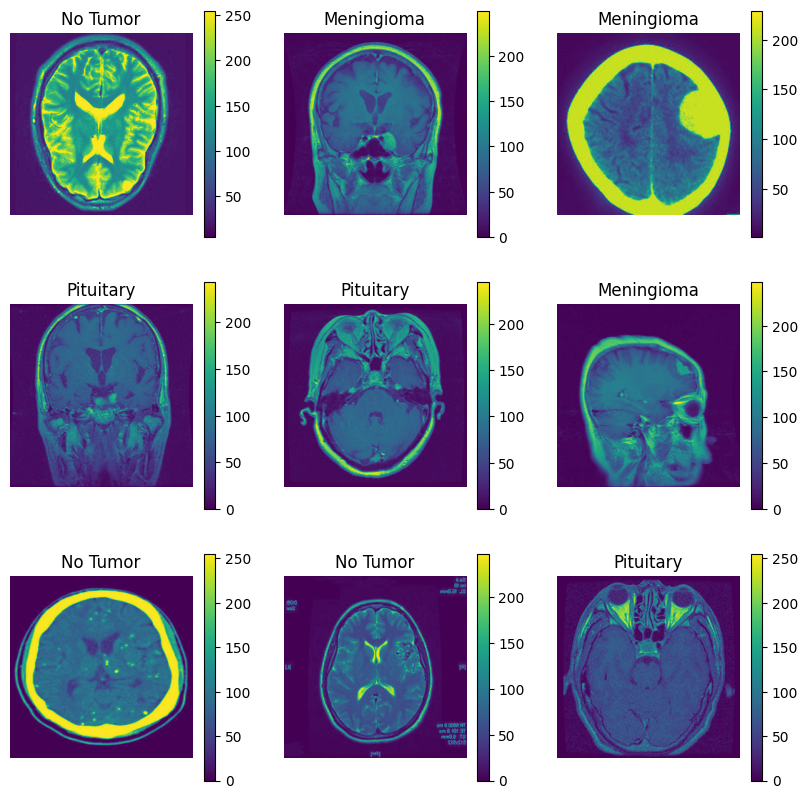

In [20]:
class_names = ["Glioma", "Meningioma", "No Tumor", "Pituitary"]

plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy())
        plt.title(class_names[labels[i]])
        plt.axis("off")
        plt.colorbar()

plt.show()

Here are some example images from the verification dataset. They are grayscale, but are represented here with colors for higher contrast.

21/21 [==============================] - 3s 159ms/step


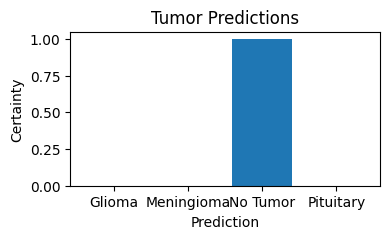

In [40]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(val_ds)

num_rows = 1
num_cols = 1
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

def plot_value_array(i, predictions_array, true_label):
    plt.grid(False)
    plt.xticks(range(4))
    plt.yticks([])
    thisplot = plt.bar(range(4), predictions_array)
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    #thisplot[true_label].set_color('blue')

# for images, labels in val_ds.take(1):
#     plt.imshow(images[i].numpy())
#     plt.title(class_names[labels[i]])
#     plt.axis("off")
#     plt.colorbar()
#     plot_value_array(0, predictions[0], labels)
#     print(predictions[0])
# plt.show()
    
for images, labels in val_ds.take(1):
    #plt.imshow(images[i].numpy())
    plt.bar(class_names, predictions[0])
    plt.xlabel("Prediction")
    plt.ylabel("Certainty")

# data = {'C':20, 'C++':15, 'Java':30, 
#         'Python':35}
# courses = list(data.keys())
# values = list(data.values())
  
# fig = plt.figure(figsize = (10, 5))
 
# # creating the bar plot
# plt.bar(class_names, labels, color ='maroon', width = 0.4)
 

plt.title("Tumor Predictions")
plt.show()